In [1]:
from wand.image import Image, Color
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
path = 'pan_card_rohan.pdf'

In [82]:
save_path = 'pancard.jpg'
    
with Image(filename = path, resolution = 300) as img:
    img.background_color = Color("White")
    img.alpha_channel = 'remove'
    img.save(filename = save_path)

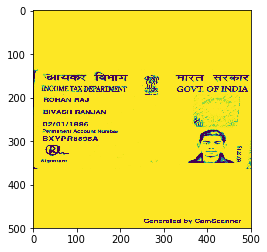

In [95]:
original = mpimg.imread('pancard-0.jpg')
resized = cv2.resize(original, (500,500))
plt.imshow(resized)

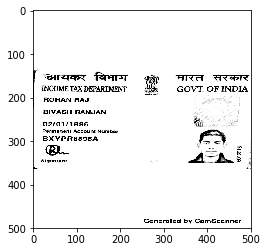

In [96]:
img = cv2.cvtColor(resized, cv2.COLOR_GRAY2RGB)
plt.imshow(img)

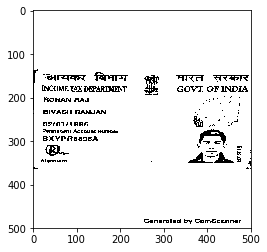

In [97]:
low_thresh = 210
upper_thresh = 255
ret,binary = cv2.threshold(img, low_thresh, upper_thresh, cv2.THRESH_BINARY)
binary = np.uint8(binary)
plt.imshow(binary)

In [7]:
blur = cv2.GaussianBlur(binary, (5,5), 0)

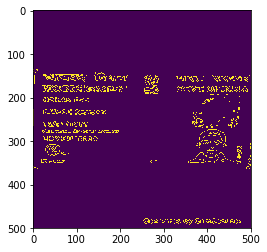

In [8]:
# Edge detection

edges = cv2.Canny(np.uint8(np.copy(blur)),150,220)
plt.imshow(edges)

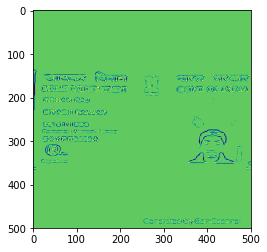

In [9]:
# Corner Detection
gray = cv2.cvtColor(blur, cv2.COLOR_RGB2GRAY)
corners = cv2.cornerHarris(np.copy(np.uint8(gray)), 2, 5, 0.07)
plt.imshow(corners)

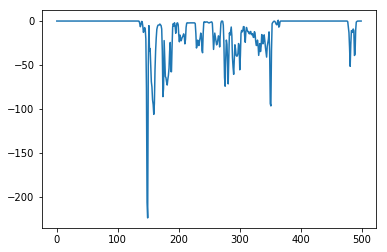

In [10]:
histogram = np.sum(corners, axis = 1)
plt.plot(histogram)

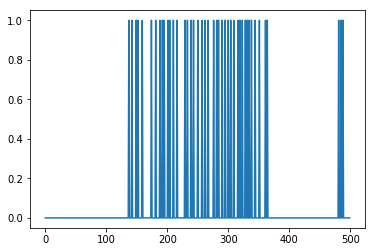

In [11]:
# Finding out local minima

booleans = np.r_[True, histogram[1:] < histogram[:-1]] & np.r_[histogram[:-1] < histogram[1:], True]
plt.plot(booleans)

In [12]:
len(booleans)

500

In [13]:
flag1 = 0

for truth in range(len(booleans)):
    
    if (booleans[truth]) & (flag1 == 0): 
        dim1 = truth
        flag1 = 1
        prev_truth = 0
        remaining = len(booleans) - dim1
    if flag1:
        for next_truth in range(remaining):
            index = dim1 + next_truth
            if booleans[index]:
                dim2 = index
                prev_truth = 0
            prev_truth += 1
            if prev_truth > 20:
                break

In [14]:
dim2

364

In [15]:
dim1

137

In [51]:
(dim1+dim2)//2

250

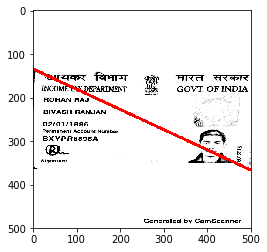

In [16]:
lined = cv2.line(np.copy(img),(0,dim1),(500,dim2),(255,0,0),5)
plt.imshow(lined)

In [17]:
from PIL import Image, ImageDraw, ImageFont

In [102]:
img = np.dstack([img, np.ones((227, 500), dtype="uint8") * 255])
img.shape

(227, 500, 4)

In [87]:
watermark = Image.open('picturetopeople.org-ae246672779428f14d9995407c60f6dc5f1c1eefcca558e37c.png')

In [88]:
w, h = watermark.size

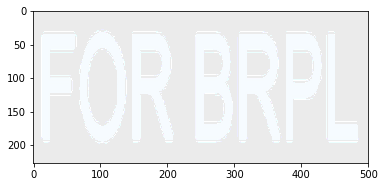

In [89]:
watermark = watermark.resize((500, img.shape[0]), Image.ANTIALIAS)
watermark.putalpha(20)
plt.imshow(watermark)

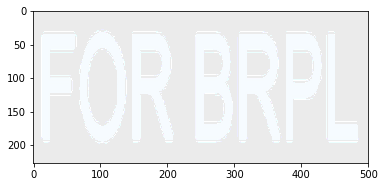

In [90]:
watermark = np.array(watermark)
plt.imshow(watermark)

In [65]:
test_watermark = np.copy(img)
start_point = (dim1 + dim2)//2
test_watermark[start_point:start_point + watermark.shape[0], 0:watermark.shape[1]] = watermark
plt.imshow(test_watermark)

ValueError: could not broadcast input array from shape (500,500,4) into shape (250,500,4)

In [91]:
watermark.shape

(227, 500, 4)

In [98]:
img = img[dim1:dim2, 0:500]

In [103]:
img.shape

(227, 500, 4)

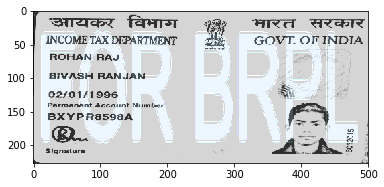

In [105]:
mask = cv2.addWeighted(np.copy(img), 0.8, watermark, 0.2, 0)
plt.imshow(mask)

In [85]:
areas = [cv2.contourArea(c) for c in contours]

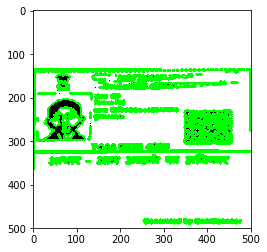

In [95]:
all_contours = cv2.drawContours(np.copy(binary), contours, -1, (0,255,0), 3)
plt.imshow(all_contours)

In [89]:
max_index = np.argmax(areas)
cnt = contours[max_index]

In [90]:
x,y,w,h = cv2.boundingRect(cnt)

In [92]:
box = cv2.rectangle(np.copy(binary),(x,y),(x+w,y+h),(0,255,0),3)

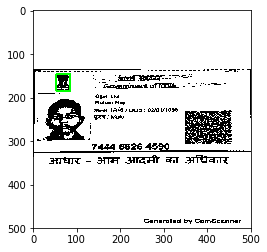

In [93]:
plt.imshow(box)